### PPO AGENT:

#### Load the dataset and preprocess the dataframe in the required format.

Technical indicators created for the environment include:

- RSI
- MACD
- Stoch_k
- OBV
- Upper_BB
- ATR_1
- ATR_2
- ATR_5
- ATR_10
- ATR_20

In [86]:
import pandas as pd
import numpy as np
import talib as ta

class TechnicalIndicators:
    def __init__(self, data):
        self.data = data

    def add_momentum_indicators(self):
        self.data['RSI'] = ta.RSI(self.data['Close'], timeperiod=14)
        self.data['MACD'], self.data['MACD_signal'], self.data['MACD_hist'] = ta.MACD(self.data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
        self.data['Stoch_k'], self.data['Stoch_d'] = ta.STOCH(self.data['High'], self.data['Low'], self.data['Close'],
                                                              fastk_period=14, slowk_period=3, slowd_period=3)

    def add_volume_indicators(self):
        self.data['OBV'] = ta.OBV(self.data['Close'], self.data['Volume'])
        self.data['Kama'] = ta.KAMA(self.['Volume'],timeperiod = 14)

    def add_volatility_indicators(self):
        self.data['Upper_BB'], self.data['Middle_BB'], self.data['Lower_BB'] = ta.BBANDS(self.data['Close'], timeperiod=20)
        self.data['ATR_1'] = ta.ATR(self.data['High'], self.data['Low'], self.data['Close'], timeperiod=1)
        self.data['ATR_2'] = ta.ATR(self.data['High'], self.data['Low'], self.data['Close'], timeperiod=2)
        self.data['ATR_5'] = ta.ATR(self.data['High'], self.data['Low'], self.data['Close'], timeperiod=5)
        self.data['ATR_10'] = ta.ATR(self.data['High'], self.data['Low'], self.data['Close'], timeperiod=10)
        self.data['ATR_20'] = ta.ATR(self.data['High'], self.data['Low'], self.data['Close'], timeperiod=20)

    def add_trend_indicators(self):
        self.data['ADX'] = ta.ADX(self.data['High'], self.data['Low'], self.data['Close'], timeperiod=14)
        self.data['+DI'] = ta.PLUS_DI(self.data['High'], self.data['Low'], self.data['Close'], timeperiod=14)
        self.data['-DI'] = ta.MINUS_DI(self.data['High'], self.data['Low'], self.data['Close'], timeperiod=14)
        self.data['CCI'] = ta.CCI(self.data['High'], self.data['Low'], self.data['Close'], timeperiod=5)
        self.data['sar'] = ta.SAR(self.data['High'], self.data['Low'], maximum = 0.02)

    def add_other_indicators(self):
        self.data['DLR'] = np.log(self.data['Close'] / self.data['Close'].shift(1))
        self.data['TWAP'] = self.data['Close'].expanding().mean()
        self.data['VWAP'] = (self.data['Volume'] * (self.data['High'] + self.data['Low']) / 2).cumsum() / self.data['Volume'].cumsum()

    def add_all_indicators(self):
        self.add_momentum_indicators()
        self.add_volume_indicators()
        self.add_volatility_indicators()
        self.add_trend_indicators()
        self.add_other_indicators()
        return self.data

In [55]:
data = pd.read_csv('/Users/seamusconlon/Desktop/Blockhouse/xnas-itch-20230703.tbbo.csv')

# Preprocessing to create necessary columns
data['price']=data['price']/1e9
data['bid_px_00']=data['bid_px_00']/1e9
data['ask_px_00']=data['ask_px_00']/1e9

data['Close'] = data['price']
data['Volume'] = data['size']
data['High'] = data[['bid_px_00', 'ask_px_00']].max(axis=1)
data['Low'] = data[['bid_px_00', 'ask_px_00']].min(axis=1)
data['Open'] = data['Close'].shift(1).fillna(data['Close'])


ti = TechnicalIndicators(data)
df_with_indicators = ti.add_all_indicators()
market_features_df = df_with_indicators[35:]

Checking the dataset:

In [58]:
# Show all columns in pandas
pd.set_option('display.max_columns', None)

market_features_df.head(35)

,ts_recv,ts_event,rtype,publisher_id,instrument_id,action,side,depth,price,size,flags,ts_in_delta,sequence,bid_px_00,ask_px_00,bid_sz_00,ask_sz_00,bid_ct_00,ask_ct_00,symbol,Close,Volume,High,Low,Open,RSI,MACD,MACD_signal,MACD_hist,Stoch_k,Stoch_d,OBV,Upper_BB,Middle_BB,Lower_BB,ATR_1,ATR_2,ATR_5,ATR_10,ATR_20,ADX,+DI,-DI,CCI,DLR,TWAP,VWAP
35,1688371214386057385,1688371214385893078,1,2,32,T,N,0,194.05,50,130,164307,326232,194.00,194.30,3101,19,4,10,AAPL,194.05,50,194.30,194.00,194.05,54.544543,0.006271,-0.003130,0.009401,5.252525e+01,61.952862,-266.0,194.065621,194.0170,193.968379,0.30,0.175078,0.098615,0.075141,0.072403,97.257397,30.435801,0.196362,166.666667,0.000000,194.020000,194.021894
36,1688371214386063777,1688371214385899379,1,2,32,T,N,0,194.05,50,130,164398,326233,194.00,194.30,3101,19,4,10,AAPL,194.05,50,194.30,194.00,194.05,54.544543,0.007108,-0.001082,0.008190,3.838384e+01,52.525253,-266.0,194.068990,194.0200,193.971010,0.30,0.237539,0.138892,0.097627,0.083783,97.361721,22.989295,0.148320,83.333333,0.000000,194.020811,194.025188
37,1688371215804852019,1688371215804687301,1,2,32,T,B,0,194.21,10,130,164718,328131,194.00,194.21,3101,29,4,1,AAPL,194.21,10,194.21,194.00,194.05,85.890753,0.020446,0.003223,0.017223,4.040404e+01,43.771044,-256.0,194.125889,194.0305,193.935111,0.21,0.223770,0.153114,0.108864,0.090094,97.458593,19.409454,0.125224,79.268293,0.000824,194.025789,194.025596
38,1688371219671476629,1688371219671312224,1,2,32,T,N,0,194.14,10,130,164405,331406,194.00,194.16,3101,400,4,1,AAPL,194.14,10,194.16,194.00,194.21,64.827662,0.025079,0.007594,0.017484,4.949495e+01,42.760943,-266.0,194.142928,194.0375,193.932072,0.21,0.216885,0.164491,0.118978,0.096089,97.548546,16.622008,0.107240,-3.205128,-0.000360,194.028718,194.025873
39,1688371223368835585,1688371223368671235,1,2,32,T,B,0,194.13,10,130,164350,334235,194.00,194.13,3101,400,4,1,AAPL,194.13,10,194.13,194.00,194.14,62.470772,0.027625,0.011601,0.016025,5.757576e+01,49.158249,-276.0,194.155247,194.0440,193.932753,0.14,0.178442,0.159593,0.121080,0.098285,97.632074,15.068361,0.097216,-113.095238,-0.000052,194.031250,194.026071
40,1688371229849940201,1688371229849775570,1,2,32,T,B,0,194.13,100,130,164631,339055,194.01,194.13,101,390,2,1,AAPL,194.13,100,194.13,194.01,194.13,62.470772,0.029305,0.015141,0.014164,4.949495e+01,52.188552,-276.0,194.165821,194.0505,193.935179,0.12,0.149221,0.151674,0.120972,0.099370,97.709636,13.871534,0.089495,-64.102564,0.000000,194.033659,194.028188
41,1688371230451172473,1688371230451005195,1,2,32,T,N,0,194.02,10,0,167278,339547,194.01,194.16,101,400,2,1,AAPL,194.02,10,194.16,194.01,194.13,42.676806,0.021513,0.016416,0.005097,3.454545e+01,47.205387,-286.0,194.165390,194.0515,193.937610,0.15,0.149611,0.151339,0.123875,0.101902,97.793820,14.463498,0.080850,-113.425926,-0.000567,194.033333,194.028460
42,1688371230451172473,1688371230451005195,1,2,32,T,A,0,194.01,1,0,167278,339548,194.01,194.16,101,400,2,1,AAPL,194.01,1,194.16,194.01,194.02,41.392784,0.014365,0.016006,-0.001641,1.949495e+01,34.511785,-287.0,194.165066,194.0520,193.938934,0.15,0.149805,0.151071,0.126487,0.104307,97.871992,13.100725,0.073232,-90.909091,-0.000052,194.032791,194.028488
43,1688371230451172473,1688371230451005195,1,2,32,T,A,0,194.01,100,130,167278,339549,194.01,194.16,100,400,1,1,AAPL,194.01,100,194.16,194.01,194.01,41.392784,0.008601,0.014525,-0.005924,4.444444e+00,19.494949,-287.0,194.164727,194.0525,193.940273,0.15,0.149903,0.150857,0.128839,0.106591,97.944580,11.893862,0.066486,-61.224490,0.000000,194.032273,194.031073
44,1688371230451995982,1688371230451829005,1,2,32,T,A,0,194.00,3075,0,166977,339553,194.00,194.16,3119,400,5,1,AAPL,194.00,3075,194.16,194.00,194.01,39.997126,0.003189,0.012257,-0.009069,2.222222e+00,8.720539,-3362.0,194.164727,194.0525,193.940273,0.16,0.154951,0.152686,0.131955,0.109262,97.267563,10.755675,0.658220,-81.081081,-0.000052,194.031556,194.059670


In [60]:
df_with_indicators.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59271 entries, 0 to 59270
Data columns (total 47 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ts_recv        59271 non-null  int64  
 1   ts_event       59271 non-null  int64  
 2   rtype          59271 non-null  int64  
 3   publisher_id   59271 non-null  int64  
 4   instrument_id  59271 non-null  int64  
 5   action         59271 non-null  object 
 6   side           59271 non-null  object 
 7   depth          59271 non-null  int64  
 8   price          59271 non-null  float64
 9   size           59271 non-null  int64  
 10  flags          59271 non-null  int64  
 11  ts_in_delta    59271 non-null  int64  
 12  sequence       59271 non-null  int64  
 13  bid_px_00      59271 non-null  float64
 14  ask_px_00      59271 non-null  float64
 15  bid_sz_00      59271 non-null  int64  
 16  ask_sz_00      59271 non-null  int64  
 17  bid_ct_00      59271 non-null  int64  
 18  ask_ct

#### Create the Trading Environment class for the PPO Agent

"""
    1.	Feature Engineering
    
TWAP (Time Weighted Average Price:
eAdding this will allow us to better understand the 'temporary impact' of our trades. 
     day.
VWAP (Volume Weighted Average :

Adding the VWAP will help us to understand the 'permanent impact' of the trades.rhe market.


: By analyzing the price differences over specific intervals, it provides insights into the market's volatility and potential p  ce reversal Additionally,es: It helps in timing trades based on recent price movements, allowing for better eny a
    ndAR:S
SAR will help make inferences about market direction. This will influence the decision to trade in a large block now or break the trade into smaller orders.
    iKaufman Moving Average:

Because the security is very liquid, it makes sense to add a more sensitive indicator of volume.aCombining These Indicators
When combined, these indicators provide a holistic view of the market, enhancing the model's ability to make i    nformed trading decisions:
1.	Enhanced Execution Strategies: TWAP and VWAP benchmarks help in designing execution strategies that minimize market impact an    d optimize trade execution.
2.	C SAR and KAMAts_in_delta, volume, and size provide a detailed picture of market conditions, including short-term price movements, liquidity """e Calculations – Find Code here


In [63]:
import gym
from gym import spaces
import numpy as np
import pandas as pd

class TradingEnvironment(gym.Env):
    metadata = {'render.modes': ['human']}

    def __init__(self, data, daily_trading_limit):
        super(TradingEnvironment, self).__init__()
        self.data = data
        self.daily_trading_limit = daily_trading_limit
        self.current_step = 0

        # Extract state columns
        self.state_columns = ['Close', 'Volume', 'RSI', 'MACD', 'MACD_signal', 'MACD_hist', 'Stoch_k', 'Stoch_d',
                              'OBV', 'Upper_BB', 'Middle_BB', 'Lower_BB', 'ATR_1', 'ADX', '+DI', '-DI', 'CCI', 'TWAP', 'VWAP', 'ts_in_delta', 'sar', 'KAMA']

        # Adding TWAP, VWAP, Ts_in_delta, size, Volume

        # Initialize balance, shares held, and total shares traded
        self.balance = 10_000_000.0  # $10 million
        self.shares_held = 0
        self.total_shares_traded = 0

        # Define action space: [Hold, Buy, Sell]
        self.action_space = spaces.Discrete(3)

        # Define observation space based on state columns
        self.observation_space = spaces.Box(
            low=-np.inf, high=np.inf, shape=(len(self.state_columns),), dtype=np.float32
        )

    def reset(self):
        self.current_step = 0
        self.balance = 10_000_000.0  # $10 million
        self.shares_held = 0
        self.total_shares_traded = 0
        self.cumulative_reward = 0
        self.trades = []
        return self._next_observation()

    def _next_observation(self):
        return self.data[self.state_columns].iloc[self.current_step].values

    def step(self, action):
        expected_price = self.data.iloc[self.current_step]['ask_px_00']
        actual_price = self.data.iloc[self.current_step]['price']
        transaction_time = self.data.iloc[self.current_step]['ts_in_delta']
        self._take_action(action)
        reward = 0
        
        if self.current_step >= len(self.data) - 1:
            self.current_step = 0
        if action != 0:
            transaction_cost= self._calculate_transaction_cost(self.data.iloc[self.current_step]['Volume'], 0.3, self.data['Volume'].mean())
            reward = self._calculate_reward(expected_price, actual_price, transaction_time, transaction_cost)
            self.cumulative_reward += reward
            if self.trades:
                self.trades[-1]['reward'] = reward
                self.trades[-1]['transaction_cost'] = transaction_cost
                self.trades[-1]['slippage'] = expected_price - actual_price
                self.trades[-1]['time_penalty'] = 100*transaction_time/1e9
        done = self.current_step == len(self.data) - 1
        obs = self._next_observation()
        info = {
        'step': self.current_step,
        'action': action,
        'price': actual_price,
        'shares': self.trades[-1]['shares'] if self.trades else 0
    }
        self.current_step += 1

        return obs, reward, done, info

    def _take_action(self, action):
        current_price = self.data.iloc[self.current_step]['Close']
        current_time = pd.to_datetime(self.data.iloc[self.current_step]['ts_event'])
        trade_info = {'step': self.current_step, 'timestamp': current_time, 'action': action, 'price': current_price, 'shares': 0, 'reward': 0, 'transaction_cost': 0, 'slippage': 0, 'time_penalty': 0}

        if action == 1: # and self.total_shares_traded < self.daily_trading_limit:  # Buy
            shares_bought = (self.balance * np.random.uniform(0.001, 0.005)) // current_price
            self.balance -= shares_bought * current_price
            self.shares_held += shares_bought
            self.total_shares_traded += shares_bought
            trade_info['shares'] = shares_bought
            if(shares_bought>0):
                self.trades.append(trade_info)
        elif action == 2: # and self.total_shares_traded < self.daily_trading_limit:  # Sell
            shares_sold = min((self.balance * np.random.uniform(0.001, 0.005)) // current_price, self.shares_held)
            self.balance += shares_sold * current_price
            self.shares_held -= shares_sold
            self.total_shares_traded -= shares_sold
            trade_info['shares'] = shares_sold
            if(shares_sold>0):
                self.trades.append(trade_info)

    def _calculate_reward(self, expected_price, actual_price, transaction_time, transaction_cost):
        slippage = expected_price - actual_price
        time_penalty = 100*transaction_time/1e9
        reward = - (slippage + time_penalty + transaction_cost)
        return reward
    
    def _calculate_transaction_cost(self, volume, volatility, daily_volume):
        return volatility * np.sqrt(volume / daily_volume)
    
    def run(self):
        self.reset()
        for _ in range(len(self.data)):
            self.step()
        return self.cumulative_reward, self.trades

    def render(self, mode='human', close=False):
        print(f'Step: {self.current_step}')
        print(f'Balance: {self.balance}')
        print(f'Shares held: {self.shares_held}')
        print(f'Total shares traded: {self.total_shares_traded}')
        print(f'Total portfolio value: {self.balance + self.shares_held * self.data.iloc[self.current_step]["Close"]}')
        print(f'Cumulative reward: {self.cumulative_reward}')
        self.print_trades()

    def print_trades(self):
        # download all trades in a pandas dataframe using .csv
        trades_df = pd.DataFrame(self.trades)
        # Save a csv
        trades_df.to_csv('trades_ppo.csv', index=False)
        for trade in self.trades:
            print(f"Step: {trade['step']}, Timestamp: {trade['timestamp']}, Action: {trade['action']}, Price: {trade['price']}, Shares: {trade['shares']}, Reward: {trade['reward']}, Transaction Cost: {trade['transaction_cost']}, Slippage: {trade['slippage']}, Time Penalty: {trade['time_penalty']}")

#### Train the PPO Agent with the environment and for different tickers.

In [66]:
# Define the daily trading limit (total number of shares to trade per day)
daily_trading_limit = 1000

ticker = 'AAPL'  # Specify the ticker you want to trade
ticker_data = market_features_df[market_features_df['symbol'] == ticker]

env = TradingEnvironment(ticker_data, daily_trading_limit)  # Adjust window_size if needed

In [ ]:
import pandas as pd
from stable_baselines3 import PPO

# Define the daily trading limit (total number of shares to trade per day)
daily_trading_limit = 1000

ticker = 'AAPL'  # Specify the ticker you want to trade
ticker_data = market_features_df[market_features_df['symbol'] == ticker]

# Create the trading environment
env = TradingEnvironment(ticker_data, daily_trading_limit)  # Adjust window_size if needed

# Define the best hyperparameters
best_hyperparameters = {'learning_rate': 0.0009931989008886031,'n_steps': 512,'batch_size': 128, 'gamma': 0.9916829193042708,'clip_range': 0.21127653449387027,'n_epochs': 6} # type: ignore

# Create the RL model with the best hyperparameters
model = PPO('MlpPolicy', env, verbose=1, **best_hyperparameters)

# Train the model
model.learn(total_timesteps=10000)

# Save the model
model.save("trading_agent")

# Evaluate the model
obs = env.reset()
for _ in range(len(ticker_data)):
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        break

# Render the final state
env.render()

### TRADING BLOTTER:

#### Preprocess the data for the trading blotter:

In [72]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

INITIAL_CASH = 10_000_000  # $10 million

def preprocess_data(df):
    df['liquidity'] = df['bid_sz_00'] * df['bid_px_00'] + df['ask_sz_00'] * df['ask_px_00']
    return df

def calculate_rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def calculate_vol_and_liquidity(price_df, volume_df, window_size):
    # Calculate rolling statistics
    rolling_mean_vol = price_df.pct_change().rolling(window=window_size).mean()
    rolling_std_vol = price_df.pct_change().rolling(window=window_size).std()
    rolling_mean_liq = volume_df.rolling(window=window_size).mean()
    rolling_std_liq = volume_df.rolling(window=window_size).std()
    
    return rolling_mean_vol, rolling_std_vol, rolling_mean_liq, rolling_std_liq

def get_percentile(current_value, mean, std):
    if std > 0:
        z_score = (current_value - mean) / std
        percentile = norm.cdf(z_score)
    else:
        percentile = 0.5  # No variation
    return percentile

def get_trade_price(base_price, current_vol, current_liq, mean_vol, std_vol, mean_liq, std_liq, trade_direction):
    vol_percentile = get_percentile(current_vol, mean_vol, std_vol)
    liq_percentile = get_percentile(current_liq, mean_liq, std_liq)

    # Define price adjustment scenarios based on market conditions
    if vol_percentile >= 0.9 and liq_percentile < 0.1:
        price_adjustment_percent = np.random.uniform(-0.25, -0.15)
    elif vol_percentile <= 0.1 and liq_percentile < 0.1:
        price_adjustment_percent = np.random.uniform(-0.10, -0.05)
    elif vol_percentile >= 0.9 and liq_percentile >= 0.9:
        price_adjustment_percent = np.random.uniform(-0.05, +0.10)
    else:
        price_adjustment_percent = np.random.uniform(-0.05, +0.05)  # Default for normal conditions

    # Adjust price based on trade direction
    if trade_direction == 'BUY':
        adjusted_price = base_price * (1 - price_adjustment_percent)
    else:  # SELL
        adjusted_price = base_price * (1 + price_adjustment_percent)
    
    return adjusted_price


#### Create trading environment for the blotter

In [75]:
class TradingEnvironmentwithBlotter:
    def __init__(self, data, daily_trading_limit, window_size):
        self.data = preprocess_data(data)
        self.daily_trading_limit = daily_trading_limit
        self.window_size = window_size
        self.state_columns = ['Close', 'Volume', 'RSI', 'MACD', 'MACD_signal', 'MACD_hist', 'Stoch_k', 'Stoch_d',
                              'OBV', 'Upper_BB', 'Middle_BB', 'Lower_BB', 'ATR_1', 'ADX', '+DI', '-DI', 'CCI', 'TWAP', 'VWAP', 'ts_in_delta', 'size', 'Volume']
        self.reset()

    def reset(self):
        self.current_step = 0
        self.balance = INITIAL_CASH
        self.shares_held = 0
        self.total_shares_traded = 0
        self.cumulative_reward = 0
        self.trades = []
        self.portfolio = {'cash': self.balance, 'holdings': {ticker: 0 for ticker in self.data['symbol'].unique()}}
        self.data['RSI'] = calculate_rsi(self.data['price'])
        self.data['pct_change'] = self.data['price'].pct_change()
        self.data['rolling_mean_vol'], self.data['rolling_std_vol'], self.data['rolling_mean_liq'], self.data['rolling_std_liq'] = calculate_vol_and_liquidity(self.data['price'], self.data['liquidity'], self.window_size)

    def step(self):
        row = self.data.iloc[self.current_step]
        current_price = row['price']
        current_time = pd.to_datetime(row['ts_event'])
        current_rsi = row['RSI']
        current_vol = row['pct_change']
        current_liq = row['liquidity']
        mean_vol = row['rolling_mean_vol']
        std_vol = row['rolling_std_vol']
        mean_liq = row['rolling_mean_liq']
        std_liq = row['rolling_std_liq']

        if current_rsi < 30:  # Entry signal based on RSI
            trade_direction = 'BUY'
            trade_price = get_trade_price(current_price, current_vol, current_liq, mean_vol, std_vol, mean_liq, std_liq, trade_direction)
            trade_size = (self.portfolio['cash'] * np.random.uniform(0.001, 0.005)) / trade_price
            if self.portfolio['cash'] >= trade_size * trade_price:
                self.portfolio['cash'] -= trade_size * trade_price
                self.portfolio['holdings'][row['symbol']] += trade_size
                trade_status = 'filled'
            else:
                trade_status = 'cancelled'
        elif current_rsi > 70:  # Exit signal based on RSI
            trade_direction = 'SELL'
            if self.portfolio['holdings'][row['symbol']] > 0:
                trade_size = min(self.portfolio['holdings'][row['symbol']], self.portfolio['cash']*np.random.uniform(0.001, 0.005) / current_price)
                trade_price = get_trade_price(current_price, current_vol, current_liq, mean_vol, std_vol, mean_liq, std_liq, trade_direction)
                self.portfolio['cash'] += trade_size * trade_price
                self.portfolio['holdings'][row['symbol']] -= trade_size
                trade_status = 'filled'
            else:
                trade_size = 0
                trade_status = 'cancelled'
        else:
            trade_direction = 'HOLD'
            trade_size = 0
            trade_price = current_price
            trade_status = 'skipped'

        if trade_size > 0:
            expected_price = row['ask_px_00']
            actual_price = row['price']
            transaction_time = row['ts_in_delta']
            transaction_cost = self._calculate_transaction_cost(row['Volume'], 0.3, self.data['Volume'].mean())
            slippage = expected_price - actual_price
            time_penalty = 1000 * transaction_time / 1e9
            reward = - (slippage + time_penalty + transaction_cost)
        
            self.cumulative_reward += reward
            self.trades.append({
                'step': self.current_step,
                'timestamp': current_time,
                'action': trade_direction,
                'price': trade_price,
                'shares': trade_size,
                'symbol': row['symbol'],
                'reward': reward,
                'transaction_cost': transaction_cost,
                'slippage': slippage,
                'time_penalty': time_penalty
            })

            

        self.current_step += 1
        if self.current_step >= len(self.data) - 1:
            done=True
            self.current_step = 0

    def _calculate_transaction_cost(self, volume, volatility, daily_volume):
        return volatility * np.sqrt(volume / daily_volume)

    def run(self):
        self.reset()
        for _ in range(len(self.data)):
            self.step()
        return self.cumulative_reward, self.trades

    def render(self):
        print(f'Cumulative reward: {self.cumulative_reward}')
        row = self.data.iloc[self.current_step]
        print(f'Total portfolio value: {self.portfolio["cash"] + self.portfolio["holdings"][row["symbol"]]*row["Close"]}')
        # get trades in a pandas dataframe
        trades_df = pd.DataFrame(self.trades)
        # Save a csv
        trades_df.to_csv('trades_blotter.csv', index=False)
        for trade in self.trades:
            print(f"Step: {trade['step']}, Timestamp: {trade['timestamp']}, Action: {trade['action']}, Price: {trade['price']}, Shares: {trade['shares']}, Symbol: {trade['symbol']}, Reward: {trade['reward']}, Transaction Cost: {trade['transaction_cost']}, Slippage: {trade['slippage']}, Time Penalty: {trade['time_penalty']}")

#### Run the trading blotter

In [78]:
# Filter data for the specified ticker
ticker = 'AAPL'  # Specify the ticker you want to trade
ticker_data = market_features_df[market_features_df['symbol'] == ticker]

window_size = 60
daily_trading_limit = 1000
# Create the trading environment
env = TradingEnvironmentwithBlotter(ticker_data, daily_trading_limit=1000, window_size=window_size)  # Daily trading limit of 1000 shares

# Run the environment
cumulative_reward, trades = env.run()

# Render the results
env.render()

Cumulative reward: -12231.228875703917
Total portfolio value: 10021958.441188717


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



Step: 43437, Timestamp: 2023-07-03 15:34:02.022134159, Action: BUY, Price: 185.63870494711298, Shares: 0.1677357078533992, Symbol: AAPL, Reward: -0.22343900435159042, Transaction Cost: 0.04399100435157111, Slippage: 0.010000000000019327, Time Penalty: 0.169448
Step: 43438, Timestamp: 2023-07-03 15:34:02.022134159, Action: BUY, Price: 200.4692092293944, Shares: 0.5210591838875038, Symbol: AAPL, Reward: -0.21536650464465384, Transaction Cost: 0.03591850464463453, Slippage: 0.010000000000019327, Time Penalty: 0.169448
Step: 43439, Timestamp: 2023-07-03 15:34:02.022134159, Action: BUY, Price: 186.11369162596336, Shares: 0.42311919882788335, Symbol: AAPL, Reward: -0.2048462182043209, Transaction Cost: 0.025398218204301576, Slippage: 0.010000000000019327, Time Penalty: 0.169448
Step: 43440, Timestamp: 2023-07-03 15:34:02.022134159, Action: BUY, Price: 196.81185541019636, Shares: 0.4757637439916866, Symbol: AAPL, Reward: -0.25976421803556404, Transaction Cost: 0.08031621803554471, Slippage: 0

In [80]:
df=market_features_df.copy()

In [82]:
df['timestamp']=pd.to_datetime(df['ts_recv'])

In [84]:
df.head()

,ts_recv,ts_event,rtype,publisher_id,instrument_id,action,side,depth,price,size,flags,ts_in_delta,sequence,bid_px_00,ask_px_00,bid_sz_00,ask_sz_00,bid_ct_00,ask_ct_00,symbol,Close,Volume,High,Low,Open,RSI,MACD,MACD_signal,MACD_hist,Stoch_k,Stoch_d,OBV,Upper_BB,Middle_BB,Lower_BB,ATR_1,ATR_2,ATR_5,ATR_10,ATR_20,ADX,+DI,-DI,CCI,DLR,TWAP,VWAP,timestamp
35,1688371214386057385,1688371214385893078,1,2,32,T,N,0,194.05,50,130,164307,326232,194.0,194.30,3101,19,4,10,AAPL,194.05,50,194.30,194.0,194.05,54.544543,0.006271,-0.003130,0.009401,52.525253,61.952862,-266.0,194.065621,194.0170,193.968379,0.30,0.175078,0.098615,0.075141,0.072403,97.257397,30.435801,0.196362,166.666667,0.000000,194.020000,194.021894,2023-07-03 08:00:14.386057385
36,1688371214386063777,1688371214385899379,1,2,32,T,N,0,194.05,50,130,164398,326233,194.0,194.30,3101,19,4,10,AAPL,194.05,50,194.30,194.0,194.05,54.544543,0.007108,-0.001082,0.008190,38.383838,52.525253,-266.0,194.068990,194.0200,193.971010,0.30,0.237539,0.138892,0.097627,0.083783,97.361721,22.989295,0.148320,83.333333,0.000000,194.020811,194.025188,2023-07-03 08:00:14.386063777
37,1688371215804852019,1688371215804687301,1,2,32,T,B,0,194.21,10,130,164718,328131,194.0,194.21,3101,29,4,1,AAPL,194.21,10,194.21,194.0,194.05,85.890753,0.020446,0.003223,0.017223,40.404040,43.771044,-256.0,194.125889,194.0305,193.935111,0.21,0.223770,0.153114,0.108864,0.090094,97.458593,19.409454,0.125224,79.268293,0.000824,194.025789,194.025596,2023-07-03 08:00:15.804852019
38,1688371219671476629,1688371219671312224,1,2,32,T,N,0,194.14,10,130,164405,331406,194.0,194.16,3101,400,4,1,AAPL,194.14,10,194.16,194.0,194.21,64.827662,0.025079,0.007594,0.017484,49.494949,42.760943,-266.0,194.142928,194.0375,193.932072,0.21,0.216885,0.164491,0.118978,0.096089,97.548546,16.622008,0.107240,-3.205128,-0.000360,194.028718,194.025873,2023-07-03 08:00:19.671476629
39,1688371223368835585,1688371223368671235,1,2,32,T,B,0,194.13,10,130,164350,334235,194.0,194.13,3101,400,4,1,AAPL,194.13,10,194.13,194.0,194.14,62.470772,0.027625,0.011601,0.016025,57.575758,49.158249,-276.0,194.155247,194.0440,193.932753,0.14,0.178442,0.159593,0.121080,0.098285,97.632074,15.068361,0.097216,-113.095238,-0.000052,194.031250,194.026071,2023-07-03 08:00:23.368835585


#### Below is a summary model from Almgren and Chriss (2000)
#### For me, the most imprtant parts of this paper were the efficient frontier and the concept of the half-life.

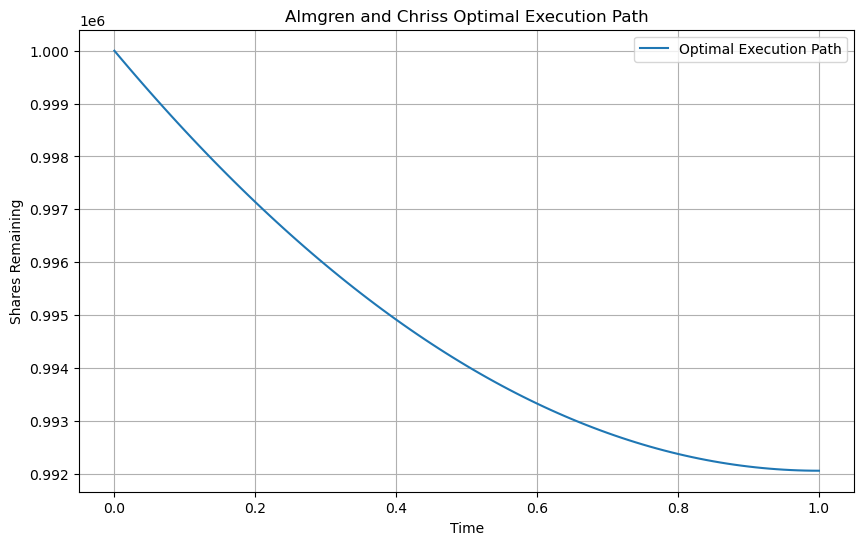

In [47]:
import numpy as np
import matplotlib.pyplot as plt

def almgren_chriss(T, N, X, sigma, gamma, eta, epsilon, lambda_):
    """
    Implements the Almgren-Chriss model for optimal trade execution.

    Parameters:
    T      : float, total time horizon
    N      : int, number of discrete time steps
    X      : float, total quantity to be executed
    sigma  : float, volatility of the asset
    gamma  : float, risk aversion parameter
    eta    : float, temporary impact parameter
    epsilon: float, fixed cost per share
    lambda_: float, permanent impact parameter

    Returns:
    t  : array, time steps
    x  : array, optimal execution trajectory
    """

    dt = T / N
    kappa = np.sqrt((gamma * sigma ** 2) / eta)
    t = np.linspace(0, T, N + 1)
    
    # Optimal trajectory
    x = X * (np.cosh(kappa * (T - t)) / np.cosh(kappa * T))
    
    return t, x

# Parameters
T = 1.0          # Total time horizon
N = 100          # Number of discrete time steps
X = 1000000      # Total quantity to be executed
sigma = 0.2      # Volatility of the asset
lambda_ = 1e-6     # Risk aversion parameter
eta = 2.5e-6     # Temporary impact parameter
epsilon = 0.0    # Fixed cost per share
gamma = 1e-6   # Permanent impact parameter

# Calculate optimal execution path
t, x = almgren_chriss(T, N, X, sigma, gamma, eta, epsilon, lambda_)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, x, label='Optimal Execution Path')
plt.xlabel('Time')
plt.ylabel('Shares Remaining')
plt.title('Almgren and Chriss Optimal Execution Path')
plt.legend()
plt.grid(True)
plt.show()

In [51]:
import math

# Function to calculate trade half-life
def trade_half_life(sigma, eta, gamma):

    # Calculate kappa
    kappa = math.sqrt(gamma * (sigma ** 2) / eta)
    
    # Calculate the trade half-life
    trade_half_life = math.log(2) / kappa
    
    return trade_half_life

# Example parameters
sigma = 0.02  # Volatility (sigma)
eta = 1e-6   # Temporary impact parameter (eta)
gamma = 1e-6  # Permanent impact parameter (gamma)

# Calculate trade half-life
t_half = trade_half_life(sigma, eta, gamma)
print(f"Trade Half-Life: {t_half:.4f} units of time")

Trade Half-Life: 34.6574 units of time
